**Aditya Wahyu Pratama (4101422043)**

**UTS Data Mining**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 1. Eksplorasi Awal

a. Berapa jumlah total penumpang dalam data?

Jawab: Berdasarkan hasil output diatas diperoleh total penumpang kapal titanic tersebut ada 891 penumpang.

b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.

Jawab:

Jumlah yang selamat dan tidak selamat:
Survived
0    549
1    342
Name: count, dtype: int64


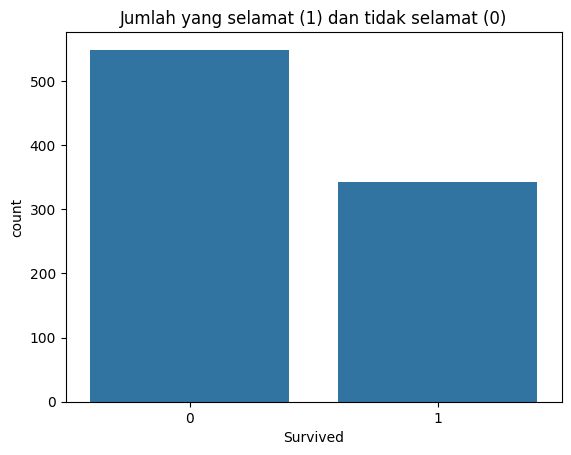

In [5]:
survived_counts = data['Survived'].value_counts()
print ("Jumlah yang selamat dan tidak selamat:")
print (survived_counts)

#Visualisasi
sns.countplot(x='Survived', data=data)
plt.title('Jumlah yang selamat (1) dan tidak selamat (0)')
plt.show()

Berdasarkan hasil output diatas, diperoleh bahwa banyaknya penumpang yang selamat ada 342 penumpang dan yang tidak selamat ada 549 penumpang.

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

Jawab:

In [6]:
print("\nRata-rata umur:", data['Age'].mean())
print("Penumpang termuda:", data['Age'].min())
print("Penumpang tertua:", data['Age'].max())
termuda = data['Age'].min()
tertua = data['Age'].max()
youngest_passenger = data.loc[data['Age'] == termuda, 'Name'].values[0]
oldest_passenger = data.loc[data['Age'] == tertua, 'Name'].values[0]
print(f"Nama penumpang termuda: {youngest_passenger}")
print(f"Nama penumpang tertua: {oldest_passenger}")


Rata-rata umur: 29.69911764705882
Penumpang termuda: 0.42
Penumpang tertua: 80.0
Nama penumpang termuda: Thomas, Master. Assad Alexander
Nama penumpang tertua: Barkworth, Mr. Algernon Henry Wilson


Berdasarkan hasil output diatas diperoleh bahwa rata-rata umur penumpang yaitu 29,69911764705882. Penumpang termuda ada Thomas dan Master. Assad Alexander. Penumpang tertua ada Barkworth dan Mr. Algernon Henry wilson.

d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan.

Jawab:

Jumlah berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


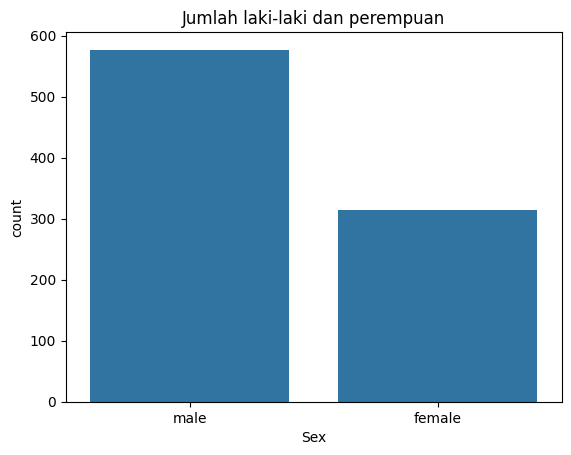

In [7]:
gender_counts = data['Sex'].value_counts()
print("Jumlah berdasarkan jenis kelamin:")
print(gender_counts)

#Visualisasi
sns.countplot(x='Sex', data=data)
plt.title('Jumlah laki-laki dan perempuan')
plt.show()

Berdasarkan hasil output diatas diperoleh bahwa jumlah penumpang berdasarkan jenis kelamin sebanyak 891 penumpang, dengan penumpang laki-laki sebanyak 577 orang dan penumpang perempuan sebanyak 314 orang.

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclasc) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

Jawab:

   Kelas  Jumlah
0      3     491
1      1     216
2      2     184


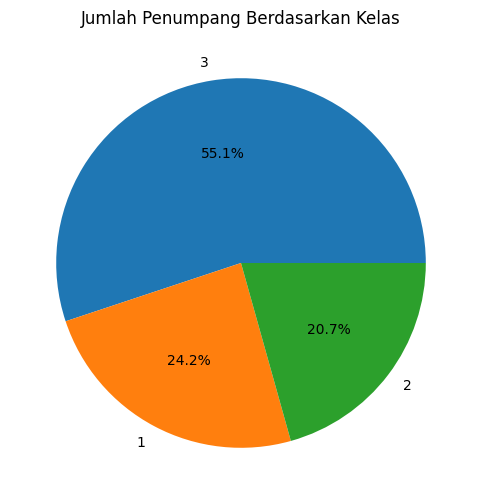

In [8]:
tabel=data['Pclass'].value_counts().reset_index()
tabel.columns=['Kelas','Jumlah']
print(tabel)

#Visualisasi
plt.figure(figsize=(6, 6))
plt.pie(tabel['Jumlah'], labels=tabel['Kelas'], autopct='%1.1f%%')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.show()

Berdasarkan hasil output diperoleh, jumlah penumpang berdasarkan kelas ada 891 penumpang dengan jumlah penumpang yang ada di kelas 1 sebanyak 24,2%.

## 2. Preprocessing

a. Apakah ada missing value pada data?

Jawab:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan hasil output diatas, terdapat missing value pada kolom 'Age' sebanyak 177 missing value, kolom 'Cabin' sebanyak 687 missing value, dan kolom 'Embarked' sebanyak 2 missing value.


b. Jika ya, apa yang anda lakukan?

Jawab: Menangani missing value tersebut pada setiap kolom yang terdapat missing value.

1. Kolom 'Age'

In [12]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
np.sum(data['Age'].isnull())

np.int64(177)

In [14]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
np.sum(data['Age'].isnull())

np.int64(0)

2. Kolom 'Cabin'

In [16]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
np.sum(data['Cabin'].isnull())

np.int64(687)

Karena pada kolom 'Cabin' terlalu banyak missing valuenya maka lebih baik kolom ini dihapus saja. Selain itu, pada kolom ini isinya berupa kode teks misalnya 'B77', 'D' yang membuta proses penanganan missing value menjadi sulit.

In [18]:
data.drop('Cabin', axis=1, inplace=True)

3. Kolom 'Embarked'

In [19]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
np.sum(data['Embarked'].isnull())

np.int64(2)

In [21]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-21-e67f7aa8e8b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [22]:
np.sum(data['Embarked'].isnull())

np.int64(0)

In [23]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier!

Jawab: Outlier adalah nilai ekstrem yang menyimpang dari data lain dan dapat memengaruhi hasil analisis. Kehadiran outlier bisa membuat hasil analisis jadi tidak akurat. outlier juga bisa membuat grafik data terlihat aneh dan hasil uji statistik menjadi salah, sehingga kesimpulan yang diambil bisa keliru.

1. Boxplot

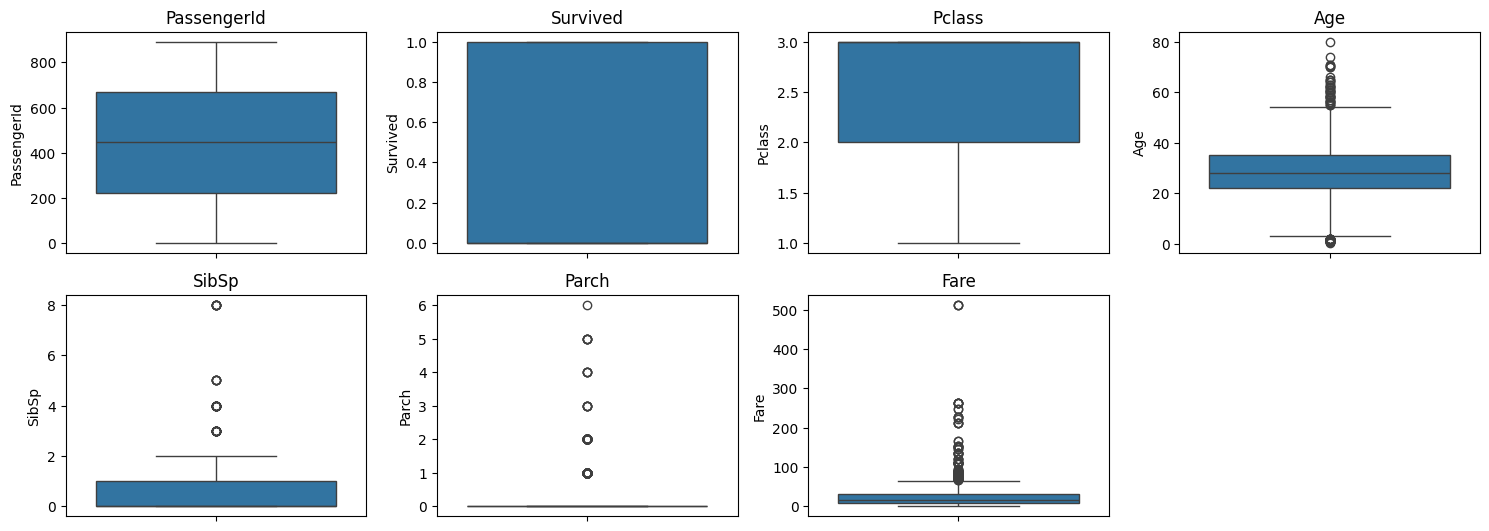

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [25]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Berdasarkan hasil output, diperoleh bahwa terdapat outliers pada beberapa kolom, seperti kolom 'Age' ada 66 outliers, kolom 'SibSp' ada 46 outliers, kolom 'Parch' ada 213 outliers, dan kolom 'Fare' ada 116 outliers.

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Jawab: Outlier perlu diatasi agar hasil analisis menjadi akurat. Metode yang dipakai adalah Winsorizing (mengganti outlier dengan batas IQR)

In [26]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

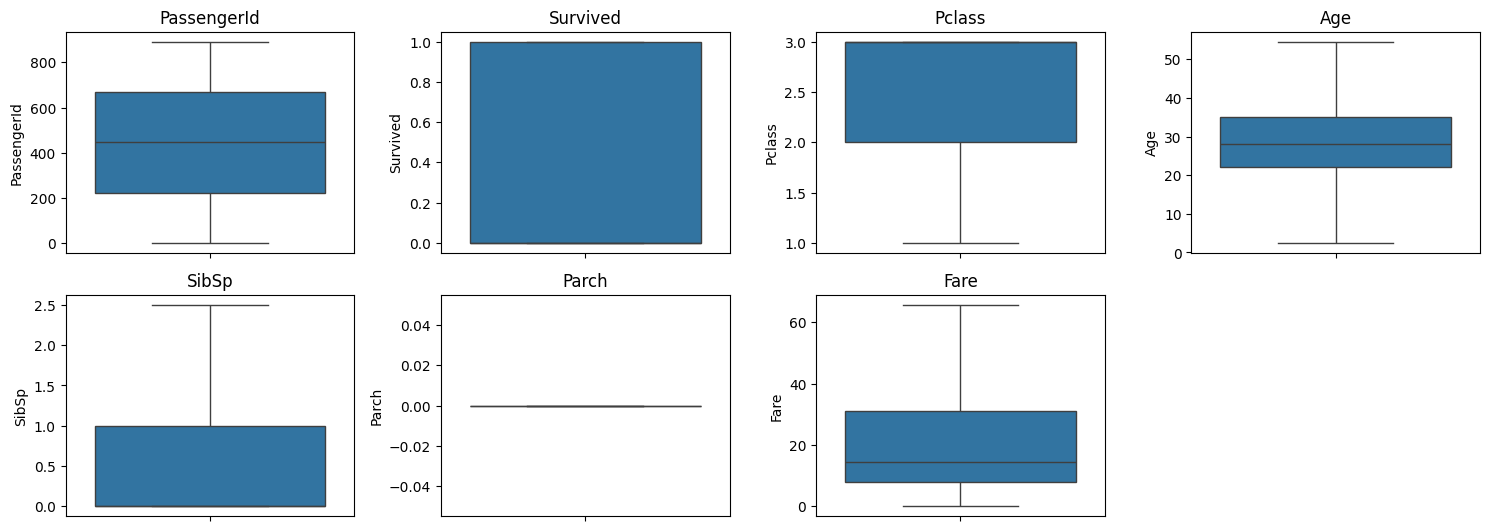

In [27]:
# Cek boxplot kembali
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

e. Jika dibutuhkan silahkan lakukan transformasi/standarisasi/scalling terhadap data tersebut

Jawab: Encoding merupakan proses transformasi yang mengubah data kategorik menjadi numerik agar dapat digunakan dalam Machine Learning. Pada data ini yang perlu dilakukan encoding adalah kolom 'Sex' dan 'Embarked'.

In [28]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [30]:
data['Sex'].unique()

array([1, 0])

In [31]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])

In [33]:
data['Embarked'].unique()

array([2, 0, 1])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 76.7+ KB


## 3. Modelling

a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut

Jawab: Split dataset merupakan proses membagi dataset menjadi data training dan data testing untuk keperluan analisis agar tidak terlalu kompleks. Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam machine learning. data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Alasan perlu membagi data tersebut adalah untuk menghindari overfitting, yaitu kondisi saat model terlalu cocok dengan data training, tapi gagal saat digunakan pada data lain.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_test = sc.fit_transform(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
print(data_test)

[[-0.78927234  0.82737724  0.73769513 ...  0.         -0.82055245
   0.58595414]
 [ 1.2669898  -1.56610693 -1.35557354 ...  0.          2.03162322
  -1.9423032 ]
 [ 1.2669898   0.82737724 -1.35557354 ...  0.         -0.78757757
   0.58595414]
 ...
 [-0.78927234  0.82737724 -1.35557354 ...  0.         -0.02915533
   0.58595414]
 [ 1.2669898  -1.56610693  0.73769513 ...  0.          0.29082313
  -1.9423032 ]
 [-0.78927234  0.82737724  0.73769513 ...  0.         -0.79612661
  -0.67817453]]


b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

Jawab: Dalam kasus ini, saya memilih membagi dengan proporsi 80%:20% dengan alasan karena umum digunakan dan data tersebut merupakan data yang besar.

In [38]:
from sklearn.model_selection import train_test_split
#menghilangkan data object
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 891
Total # of sample in train dataset: 712
Total # of sample in test dataset: 179


In [40]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331     1.0    1  45.5    0.0    0.0  28.5000         2
733     2.0    1  23.0    0.0    0.0  13.0000         2
382     3.0    1  32.0    0.0    0.0   7.9250         2
704     3.0    1  26.0    1.0    0.0   7.8542         2
813     3.0    0   6.0    2.5    0.0  31.2750         2
..      ...  ...   ...    ...    ...      ...       ...
106     3.0    0  21.0    0.0    0.0   7.6500         2
270     1.0    1  28.0    0.0    0.0  31.0000         2
860     3.0    1  41.0    2.0    0.0  14.1083         2
435     1.0    0  14.0    1.0    0.0  65.6344         2
102     1.0    1  21.0    0.0    0.0  65.6344         2

[712 rows x 7 columns]


In [41]:
print(y_train)

331    0.0
733    0.0
382    0.0
704    0.0
813    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Survived, Length: 712, dtype: float64


In [43]:
print(X_test)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709     3.0    1  28.0    1.0    0.0  15.2458         0
439     2.0    1  31.0    0.0    0.0  10.5000         2
840     3.0    1  20.0    0.0    0.0   7.9250         2
720     2.0    0   6.0    0.0    0.0  33.0000         2
39      3.0    0  14.0    1.0    0.0  11.2417         0
..      ...  ...   ...    ...    ...      ...       ...
433     3.0    1  17.0    0.0    0.0   7.1250         2
773     3.0    1  28.0    0.0    0.0   7.2250         0
25      3.0    0  38.0    1.0    0.0  31.3875         2
84      2.0    0  17.0    0.0    0.0  10.5000         2
10      3.0    0   4.0    1.0    0.0  16.7000         2

[179 rows x 7 columns]


In [44]:
print(y_test)

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
      ... 
433    0.0
773    0.0
25     1.0
84     1.0
10     1.0
Name: Survived, Length: 179, dtype: float64


c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya

Jawab:

1. KNN

Model K-Nearest Neighbors adalah suatu algoritma machine learning yang digunakan untuk klasifikasi dan regresi.

In [45]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [46]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
model = []
model.append(('KNN', KNeighborsClassifier()))

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [51]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [52]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.109394506866417
MSE data test: 0.23960273122284292


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

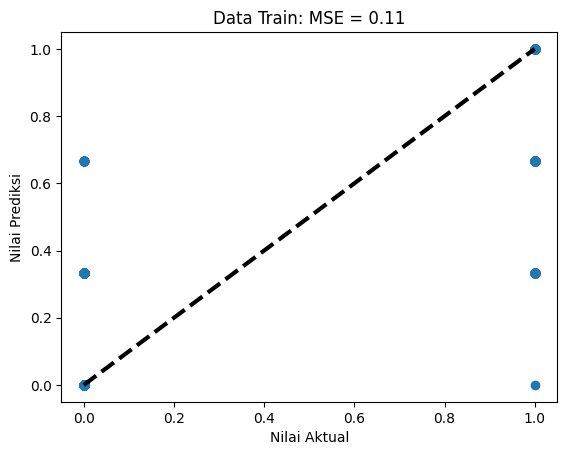

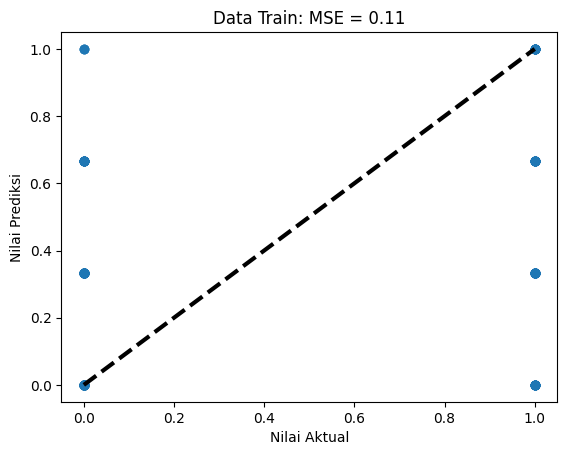

In [53]:
# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Hasil evaluasi dan Confusion Matriks

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[86 19]
 [38 36]]


0.6815642458100558

Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model KNN adalah 68,15%. Pada confusion matrix diperoleh bahwa sebanyak 86 penumpang dinyatakan benar tidak selamat, 19 penumpang dinyatakan tidak selamat tetapi sebenarnya selamat, 38 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 36 penumpang dinyatakan benar selamat.



2. Naive Bayes

Naive Bayes merupakan algoritma klasifikasi probabilistik yang didasarkan pada teorema Bayes.

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
nb = GaussianNB()

In [61]:
nb.fit(X_train, y_train)

GaussianNB()

In [62]:
nb.score(X_train, y_train)

0.7626404494382022

In [63]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_predict['NB'])
print(cm)

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

[[77 28]
 [14 60]]
NB accuracy = 0.7654


Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model Naive Bayes adalah 76,54%. Pada confusion matrix diperoleh bahwa sebanyak 77 penumpang dinyatakan benar tidak selamat, 28 penumpang dinyatakan tidak selamat tetapi sebenarnya selamat, 14 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 60 penumpang dinyatakan benar selamat.

3. Neural Network

Neural Network adalah sistem komputasi yang terinspirasi oleh struktur dan fungsi otak manusia.

In [66]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [67]:
#Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200}


In [68]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.1,max_iter=200)

clf.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.1)

In [69]:
y_pred = clf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       105
         1.0       0.67      0.81      0.73        74

    accuracy                           0.75       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.75      0.76       179



In [79]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred),3)

0.754

In [80]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[75 30]
 [14 60]]


Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model Neural Network adalah 75,4%. Pada confusion matrix diperoleh bahwa sebanyak 75 penumpang dinyatakan benar tidak selamat, 30 penumpang dinyatakan meninggal tetapi sebenarnya selamat, 14 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 60 penumpang dinyatakan benar selamat.

e. Mana yang paling antara ketiga algoritma tersebut

Jawab: Jika dilihat dari nilai akurasinya, dari ketiga algoritma tersebut yang terbaik adalah Naive Bayes. Nilai akurasi Naive Bayes lebih besar dari nilai akurasi KNN dan Neural Network.

## 4. Evaluasi

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?

Jawab:

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict['NB'], target_names=['Tidak Selamat', 'Selamat']))

               precision    recall  f1-score   support

Tidak Selamat       0.85      0.73      0.79       105
      Selamat       0.68      0.81      0.74        74

     accuracy                           0.77       179
    macro avg       0.76      0.77      0.76       179
 weighted avg       0.78      0.77      0.77       179



Berdasarkan hasil output, nilai precision untuk penumpang yang selamat sebesar 68% dan nilai recall untuk prediksi penumpang yang selamat sebesar 81%.

b. Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?

Jawab:

In [85]:
selamat=len(y_predict['NB'][y_predict['NB']==1])
print(f"Jumlah penumpang yang diprediksi selamat: {selamat}")
benar_selamat=len(y_predict['NB'][(y_predict['NB']==1)&(y_test==1)])
print(f"Jumlah penumpang yang benar-benar selamat: {benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 88
Jumlah penumpang yang benar-benar selamat: 60
